In [79]:
import pandas as pd
import re
import keyword
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
# import nltk
# nltk.download()

###Data Cleaning


In [81]:
list_questions = pd.read_excel("python_questions.xlsx",'list')
list_questions.columns = list_questions.iloc[0] #setting row 0 as header
list_questions.drop(['S.No.', 'Difficulty Level','References'], axis = 1, inplace = True) 
list_questions.drop(0, inplace = True)
list_questions.reset_index(drop=True, inplace=True)
list_questions['Question Type']='list'
list_questions.head()

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer,Question Type
0,Which of the following commands will create a ...,a) list1 = list(),b) list1 = [],"c) list1 = list([1, 2, 3])",d) all of the mentioned,d) all of the mentioned,list
1,What is the output when we execute list(“hello”)?,"a) [‘h’, ‘e’, ‘l’, ‘l’, ‘o’]",b) [‘hello’],c) [‘llo’],d) [‘olleh’],"a) [‘h’, ‘e’, ‘l’, ‘l’, ‘o’]",list
2,"Suppose listExample is [‘h’,’e’,’l’,’l’,’o’], ...",a) 5,b) 4,c) None,d) Error,a) 5,list
3,"Suppose list1 is [2445,133,12454,123], what is...",a) 2445,b) 133,c) 12454,d) 123,c) 12454,list
4,"Suppose list1 is [3, 5, 25, 1, 3], what is min...",a) 3,b) 5,c) 25,d) 1,d) 1,list


In [82]:
tuple_questions = pd.read_excel("python_questions.xlsx",'Tuples')
tuple_questions.columns = tuple_questions.iloc[0] #setting row 0 as header
tuple_questions.drop(['S.No.', 'Difficulty Level','References'], axis = 1, inplace = True) 
tuple_questions.drop(0, inplace = True)
tuple_questions.reset_index(drop=True, inplace=True)
tuple_questions['Question Type']='tuple'
tuple_questions.head()

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer,Question Type
0,Which of the following is a Python tuple?,"a) [1, 2, 3]","b) (1, 2, 3)","c) {1, 2, 3}",d) {},"b) (1, 2, 3)",tuple
1,"Suppose t = (1, 2, 4, 3), which of the followi...",a) print(t[3]),b) t[3] = 45,c) print(max(t)),d) print(len(t)),b) t[3] = 45,tuple
2,What will be the output of the following Pytho...,"a) (1, 2)","b) (1, 2, 4)","c) (2, 4)","d) (2, 4, 3)","c) (2, 4)",tuple
3,What will be the output of the following Pytho...,"a) (1, 2)","b) (1, 2, 4)","c) (2, 4)","d) (2, 4, 3)","c) (2, 4)",tuple
4,What will be the output of the following Pytho...,"a) [2, 3, 9]","b) [1, 2, 4, 3, 8, 9]","c) [1, 4, 8]","d) (1, 4, 8)","c) [1, 4, 8]",tuple


In [83]:
set_questions = pd.read_excel("python_questions.xlsx",'Set')
set_questions.columns = set_questions.iloc[0] #setting row 0 as header
set_questions.drop(['S.No.', 'Difficulty Level','References'], axis = 1, inplace = True) 
set_questions.drop(0, inplace = True)
set_questions.reset_index(drop=True, inplace=True)
set_questions['Question Type']='set'
set_questions.head()

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer,Question Type
0,Which of these about a set is not true?,a) Mutable data type,b) Allows duplicate values,c) Data type with unordered values,d) Immutable data type,d) Immutable data type,set
1,Which of the following is not the correct synt...,"a) set([[1,2],[3,4]])","b) set([1,2,2,3,4])","c) set((1,2,3,4))","d) {1,2,3,4}","a) set([[1,2],[3,4]])",set
2,What will be the output of the following Pytho...,a) 7,"b) Error, invalid syntax for formation of set",c) 4,d) 8,c) 4,set
3,What will be the output of the following Pytho...,a) 5 5 6,b) 5 6 7,c) 5 5 6 7 7 7,d) 5 6 7 7 7,c) 5 5 6 7 7 7,set
4,Which of the following statements is used to c...,a) { },b) set(),c) [ ],d) ( ),b) set(),set


In [84]:
dictionary_questions = pd.read_excel("python_questions.xlsx",'Dictionary')
dictionary_questions.columns = dictionary_questions.iloc[0] #setting row 0 as header
dictionary_questions.drop(['S.No.', 'Difficulty Level','References'], axis = 1, inplace = True) 
dictionary_questions.drop(0, inplace = True)
dictionary_questions.reset_index(drop=True, inplace=True)
dictionary_questions['Question Type']='dictionary'
dictionary_questions.head()

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer,Question Type
0,Which of the following statements create a dic...,a) d = {},"b) d = {“john”:40, “peter”:45}","c) d = {40:”john”, 45:”peter”}",d) All of the mentioned,d) All of the mentioned,dictionary
1,What will be the output of the following Pytho...,"a) “john”, 40, 45, and “peter”",b) “john” and “peter”,c) 40 and 45,"d) d = (40:”john”, 45:”peter”)",b) “john” and “peter”,dictionary
2,What will be the output of the following Pytho...,a) True,b) False,c) None,d) Error,a) True,dictionary
3,What will be the output of the following Pytho...,a) True,b) False,c) None,d) Error,b) False,dictionary
4,What will be the output of the following Pyth...,a) True,b) False,c) None,d) Error,c) None,dictionary


In [85]:
string_questions = pd.read_excel("python_questions.xlsx",'Strings')
string_questions.columns = string_questions.iloc[0] #setting row 0 as header
string_questions.drop(['S.No.', 'Difficulty Level','References'], axis = 1, inplace = True) 
string_questions.drop(0, inplace = True)
string_questions.reset_index(drop=True, inplace=True)
string_questions['Question Type']='string'
string_questions.head()

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer,Question Type
0,What will be the output of the following Pytho...,a) a,b) bc,c) bca,d) abc,d) abc,string
1,What will be the output of the following Pytho...,a) a,b) ab,c) cd,d) dc,c) cd,string
2,The output of executing string.ascii_letters c...,a) string.ascii_lowercase_string.digits,b) string.ascii_lowercase+string.ascii_uppercase,c) string.letters,d) string.lowercase_string.uppercase,b) string.ascii_lowercase+string.ascii_uppercase,string
3,What will be the output of the following Pytho...,a) olleh,b) hello,c) h,d) o,d) o,string
4,What arithmetic operators cannot be used with ...,a) +,b) *,c) –,d) All of the mentioned,c) –,string


In [86]:
function_questions = pd.read_excel("python_questions.xlsx",'Functions')
function_questions.columns = function_questions.iloc[0] #setting row 0 as header
function_questions.drop(['S.No.', 'Difficulty Level','References'], axis = 1, inplace = True) 
function_questions.drop(0, inplace = True)
function_questions.reset_index(drop=True, inplace=True)
function_questions['Question Type']='function'
function_questions.head()

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer,Question Type
0,Which of the following is the use of function ...,a) Functions are reusable pieces of programs,b) Functions don’t provide better modularity f...,c) you can’t also create your own functions,d) All of the mentioned,a) Functions are reusable pieces of programs,function
1,Which keyword is used for function?,a) Fun,b) Define,c) Def,d) Function,c) Def,function
2,What will be the output of the following Pytho...,Hello World!\nHello World!,Hello World!'\n'Hello World!',Hello\nHello,None of the mentioned,Hello World!\nHello World!,function
3,What will be the output of the following Pytho...,a) 3,b) 4,c) 4 is maximum,d) None of the mentioned,c) 4 is maximum,function
4,What will be the output of the following Pytho...,x is 50\nChanged local x to 2\nx is now 50,x is 50\nChanged local x to 2\nx is now 2,x is 50\nChanged local x to 2\nx is now 100,d) None of the mentioned,x is 50\nChanged local x to 2\nx is now 50,function


In [87]:
loop_questions = pd.read_excel("python_questions.xlsx",'While and For Loops')
loop_questions.columns = loop_questions.iloc[0] #setting row 0 as header
loop_questions.drop(['S.No.', 'Difficulty Level','References'], axis = 1, inplace = True) 
loop_questions.drop(0, inplace = True)
loop_questions.reset_index(drop=True, inplace=True)
loop_questions['Question Type']='loop'
loop_questions.head()

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer,Question Type
0,What will be the output of the following Pytho...,"a) [‘ab’, ‘cd’]","b) [‘AB’, ‘CD’]","c) [None, None]",d) none of the mentioned,"a) [‘ab’, ‘cd’]",loop
1,What will be the output of the following Pytho...,"a) [‘AB’, ‘CD’]","b) [‘ab’, ‘cd’, ‘AB’, ‘CD’]","c) [‘ab’, ‘cd’]",d) none of the mentioned,d) none of the mentioned,loop
2,What will be the output of the following Pytho...,a) 1 2,b) 1 2 3,c) error,d) none of the mentioned,c) error,loop
3,What will be the output of the following Pytho...,a) 1 2 3 4 5 6,b) 1 2 3 4 5 6 7,c) error,d) none of the mentioned,a) 1 2 3 4 5 6,loop
4,What will be the output of the following Pytho...,a) 5 6 7 8 9 10,b) 5 6 7 8,c) 5 6,d) error,b) 5 6 7 8,loop


In [88]:
basic_questions = pd.read_excel("python_questions.xlsx",'Basics')
basic_questions.columns = basic_questions.iloc[0] #setting row 0 as header
basic_questions.drop(['S.No.', 'Difficulty Level','References'], axis = 1, inplace = True) 
basic_questions.drop(0, inplace = True)
basic_questions.reset_index(drop=True, inplace=True)
basic_questions['Question Type']='basic'
basic_questions.head()

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer,Question Type
0,Who developed the Python language?,Zim Den,Guido van Rossum,Niene Stom,Wick van Rossum,Guido van Rossum,basic
1,In which year was the Python language developed?,1995,1972,1981,1989,1972,basic
2,In which language is Python written?,English,PHP,C,All of the above,C,basic
3,Which one of the following is the correct exte...,.py,.python,.p,None of these,.py,basic
4,In which year was the Python 0 version...,2008,2000,2010,2005,2008,basic


In [89]:
precedence_and_associativity_questions = pd.read_excel("python_questions.xlsx",' Precedence and Associativity ')
precedence_and_associativity_questions.columns = precedence_and_associativity_questions.iloc[0] #setting row 0 as header
precedence_and_associativity_questions.drop(['S.No.', 'Difficulty Level','References'], axis = 1, inplace = True) 
precedence_and_associativity_questions.drop(0, inplace = True)
precedence_and_associativity_questions.reset_index(drop=True, inplace=True)
precedence_and_associativity_questions['Question Type']='precedence'
precedence_and_associativity_questions.head()

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer,Question Type
0,The value of the expressions 4/(3*(2-1)) and 4...,a) True,b) False,NaN,NaN,a) True,precedence
1,What will be the value of the following Python...,a) 4,b) 7,c) 2,d) 0,b) 7,precedence
2,Evaluate the expression given below if A = 16 ...,a) 0.0,b) 0,c) 1.0,d) 1,b) 0,precedence
3,Which of the following operators has its assoc...,a) +,b) //,c) %,d) **,d) **,precedence
4,What will be the value of x in the following P...,a) 43,b) 44,c) 22,d) 23,b) 44,precedence


In [90]:
variable_name_questions = pd.read_excel("python_questions.xlsx",'Variable  Name')
variable_name_questions.columns = variable_name_questions.iloc[0] #setting row 0 as header
variable_name_questions.drop(['S.No.', 'Difficulty Level','References'], axis = 1, inplace = True) 
variable_name_questions.drop(0, inplace = True)
variable_name_questions.reset_index(drop=True, inplace=True)
variable_name_questions['Question Type']='variable'
variable_name_questions.head()

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer,Question Type
0,1. Is Python case sensitive when dealing with ...,a) yes,b) no,c) machine dependent,NaN,d) none of the mentioned,variable
1,2. What is the maximum possible length of an i...,a) 31 characters,b) 63 characters,c) 79 characters,d) none of the mentioned,d) none of the mentioned,variable
2,3. Which of the following is invalid?,a) _a = 1,b) __a = 1,c) __str__ = 1,d) none of the mentioned,d) none of the mentioned,variable
3,4. Which of the following is an invalid variable?,a) my_string_1,b) 1st_string,c) foo,d) _,b) 1st_string,variable
4,5. Why are local variable names beginning with...,a) they are used to indicate a private variabl...,b) they confuse the interpreter,c) they are used to indicate global variables,d) they slow down execution,a) they are used to indicate a private variabl...,variable


In [91]:
core_data_type_questions = pd.read_excel("python_questions.xlsx",'Core Data Types')
core_data_type_questions.columns = core_data_type_questions.iloc[0] #setting row 0 as header
core_data_type_questions.drop(['S.No.', 'Difficulty Level','References'], axis = 1, inplace = True) 
core_data_type_questions.drop(0, inplace = True)
core_data_type_questions.reset_index(drop=True, inplace=True)
core_data_type_questions['Question Type']='core'
core_data_type_questions.head()

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer,Question Type
0,Which of these in not a core data type?,a) Lists,b) Dictionary,c) Tuples,d) Class,d) Class,core
1,Given a function that does not return any valu...,a) int,b) bool,c) void,d) None,d) None,core
2,Which of the following will run without errors?,a) round(45.8),"b) round(6352.898,2,5)",c) round(),"d) round(7463.123,2,1)",a) round(45.8),core
3,What is the return type of function id?,a) int,b) float,c) bool,d) dict,a) int,core
4,"In python we do not specify types, it is dire...",a) x = 13 // 2,b) x = int(13 / 2),c) x = 13 % 2,d) All of the mentioned,d) All of the mentioned,core


In [92]:
numeric_type_questions = pd.read_excel("python_questions.xlsx",'Numeric Type')
numeric_type_questions.columns = numeric_type_questions.iloc[0] #setting row 0 as header
numeric_type_questions.drop(['S.No.', 'Difficulty Level','References'], axis = 1, inplace = True) 
numeric_type_questions.drop(0, inplace = True)
numeric_type_questions.reset_index(drop=True, inplace=True)
numeric_type_questions['Question Type']='numeric'
numeric_type_questions.head()

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer,Question Type
0,What is the output of print 0.1 + 0.2 == 0.3?,a) True,b) False,c) Machine dependent,d) Error,b) False,numeric
1,Which of the following is not a complex number?,a) k = 2 + 3j,"b) k = complex(2, 3)",c) k = 2 + 3l,d) k = 2 + 3J,c) k = 2 + 3l,numeric
2,What is the type of inf?,a) Boolean,b) Integer,c) Float,d) Complex,c) Float,numeric
3,What does ~4 evaluate to?,a) -5,b) -4,c) -3,d) +3,a) -5,numeric
4,5. What does ~~~~~~5 evaluate to?,a) +5,b) -11,c) +11,d) -5,a) +5,numeric


In [93]:
basic_operator_questions = pd.read_excel("python_questions.xlsx",'Basic Operator')
basic_operator_questions.head()
basic_operator_questions.drop(['S.No.', 'Difficulty Level','References'], axis = 1, inplace = True) 
basic_operator_questions.drop(0, inplace = True)
basic_operator_questions.reset_index(drop=True, inplace=True)
basic_operator_questions['Question Type']='operator'
basic_operator_questions.head()

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer,Question Type
0,Which one of these is floor division?,a) /,b) //,c) %,d) None of the mentioned,b) //,operator
1,What is the order of precedence in python?i) ...,"a) i,ii,iii,iv,v,vi","b) ii,i,iii,iv,v,vi","c) ii,i,iv,iii,v,vi","d) i,ii,iii,iv,vi,v","a) i,ii,iii,iv,v,vi",operator
2,"What is the answer to this expression, 22 % 3 is?",a) 7,b) 1,c) 0,d) 5,b) 1,operator
3,Mathematical operations can be performed on a ...,True,b) False,NaN,NaN,b) False,operator
4,Operators with the same precedence are evalua...,a) Left to Right,b) Right to Left,c) Can’t say,d) None of the mentioned,a) Left to Right,operator


In [94]:
final = pd.concat([list_questions , tuple_questions, set_questions, dictionary_questions, string_questions, function_questions, loop_questions, precedence_and_associativity_questions, basic_questions, basic_operator_questions,variable_name_questions,core_data_type_questions,numeric_type_questions], ignore_index=True,axis=0)

In [95]:
final.iloc[226]

Question Text     What is the result of round(0.5) – round(-0.5)?
Ans 1                                                      a) 1.0
Ans 2                                                      b) 2.0
Ans 3                                                      c) 0.0
Ans 4                          d) Value depends on Python version
Correct Answer                 d) Value depends on Python version
Question Type                                             numeric
Name: 226, dtype: object

#Splitting into test and Train

In [96]:
final_y = final['Question Type']
pd.DataFrame(final_y)

,Question Type
0,list
1,list
2,list
3,list
4,list
...,...
223,numeric
224,numeric
225,numeric
226,numeric


In [97]:
final_x = final
final_x.drop(['Question Type'], axis = 1, inplace = True) 

In [98]:
x_train, x_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.20, random_state=42,stratify=final_y)

In [99]:
x_train.reset_index(drop=True, inplace=True)
x_train

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer
0,Which of the following statements is correct f...,All variable names must begin with an ...,Unlimited length,The variable name length is a maximum...,All of the above,Unlimited length
1,What will be the output of the following Pyth...,a) 0xA0xB0xC,b) Error,c) 0x22,d) 33,d) 33
2,What will be the output of the following Pytho...,a) 1,b) 1 2,c) 1 2 3 4 5 6 …,d) 1 3 5 7 9 11 …,d) 1 3 5 7 9 11 …
3,In which year was the Python 0 version...,2008,2000,2010,2005,2008
4,What will be the output of the following Pytho...,a) 12abcdef12,b) abcdef1212,c) 1212abcdef,d) error,d) error
...,...,...,...,...,...,...
177,What will be the output of the following Pytho...,x is 50\nChanged local x to 2\nx is now 50,x is 50\nChanged local x to 2\nx is now 2,x is 50\nChanged local x to 2\nx is now 100,d) None of the mentioned,x is 50\nChanged local x to 2\nx is now 50
178,What will be the output of the following Pytho...,a) Invalid operation,"b) {3, 4, 5, 6, 7}",c) {5},"d) {3,4,6,7}","b) {3, 4, 5, 6, 7}"
179,What is the value of the following expression...,a) 8,b) 8.0,c) 8.3,d) 8.33,b) 8.0
180,What will be the output of the following Pytho...,a) cd,b) abcdef,c) error,d) none of the mentioned,c) error


In [100]:
y_train.reset_index(drop=True, inplace=True)

In [101]:
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [102]:
x_test.head()

,Question Text,Ans 1,Ans 2,Ans 3,Ans 4,Correct Answer
0,Which among the following list of operators ha...,"a) <<, >>",b) **,c) |,d) %,b) **
1,What will be the output of the following Pytho...,a) bcde,b) abcd,c) error,d) bcdd,d) bcdd
2,What will be the output of the following Pyth...,a) 000ab,b) 00ab0,c) 0ab00,d) ab000,a) 000ab
3,Which character is used in Python to make a si...,/,//,#,!,#
4,Which one of these is floor division?,a) /,b) //,c) %,d) None of the mentioned,b) //


### Extracting features

In [103]:
features = pd.DataFrame()
features_test = pd.DataFrame()

In [104]:
#Few basic features
def count_bracket_square (row):
  square = row.count('[')
  return square

def count_bracket_curly (row):
  curly = row.count('{')
  return curly

def count_bracket_round (row):
  round = row.count('(')
  return round

def count_colons (row):
  colon = row.count(':')
  return colon

def count_commas (row):
  comma = row.count(',')
  return comma

def count_lines (row):
  new_lines = row.count('\n')
  return new_lines

def count_number(row):
  numbers = sum(c.isdigit() for c in row)
  return numbers
  


features['Round Brackets'] = x_train['Question Text'].apply(count_bracket_round)
features['Square Brackets'] = x_train['Question Text'].apply(count_bracket_square)
features['Curly Brackets'] = x_train['Question Text'].apply(count_bracket_curly)
features['Colons'] = x_train['Question Text'].apply(count_colons)
features['Commas'] = x_train['Question Text'].apply(count_commas)
features['New Lines'] = x_train['Question Text'].apply(count_lines)
features['Numbers'] = x_train['Question Text'].apply(count_number)

features.head(5)

,Round Brackets,Square Brackets,Curly Brackets,Colons,Commas,New Lines,Numbers
0,0,0,0,0,0,0,0
1,1,0,0,0,0,2,3
2,1,0,0,2,0,7,4
3,0,0,0,0,0,0,1
4,2,0,0,0,1,2,4


In [105]:
features_test['Round Brackets'] = x_test['Question Text'].apply(count_bracket_round)
features_test['Square Brackets'] = x_test['Question Text'].apply(count_bracket_square)
features_test['Curly Brackets'] = x_test['Question Text'].apply(count_bracket_curly)
features_test['Colons'] = x_test['Question Text'].apply(count_colons)
features_test['Commas'] = x_test['Question Text'].apply(count_commas)
features_test['New Lines'] = x_test['Question Text'].apply(count_lines)
features_test['Numbers'] = x_test['Question Text'].apply(count_number)

features_test.head()

,Round Brackets,Square Brackets,Curly Brackets,Colons,Commas,New Lines,Numbers
0,0,0,0,0,7,2,0
1,3,0,0,0,1,2,0
2,2,0,0,0,0,2,1
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [106]:
#Code to count the number of operators in the string and the number of operators per character
operators = ['>', '<', '<=', '>=', '+', '-', '*', '/', '%', '**', '//', '=', '+=', '-=', '==', '*=', '/=', '%=', '//=', '!=', '&=', '|=', '^=', '>>=', '<<=']
r = re.compile( '|'.join( '(?:{})'.format(re.escape(o)) for o in sorted(operators, reverse=True, key=len)) )

def count_operators (row):
  operators = r.findall(row)
  cnt = len(operators) 
  return cnt;


def count_operators_per_character (row):
  operators = r.findall(row)
  cnt = len(operators) / len(row)
  return cnt



In [107]:
features["Operator Count"] = x_train['Question Text'].apply(count_operators)
features["Operator Count Per Character"] = x_train['Question Text'].apply(count_operators_per_character)

features.head()

,Round Brackets,Square Brackets,Curly Brackets,Colons,Commas,New Lines,Numbers,Operator Count,Operator Count Per Character
0,0,0,0,0,0,0,0,0,0.000000
1,1,0,0,0,0,2,3,2,0.025641
2,1,0,0,2,0,7,4,4,0.031496
3,0,0,0,0,0,0,1,0,0.000000
4,2,0,0,0,1,2,4,0,0.000000


In [108]:
features_test["Operator Count"] = x_test['Question Text'].apply(count_operators)
features_test["Operator Count Per Character"] = x_test['Question Text'].apply(count_operators_per_character)

features_test.head()

,Round Brackets,Square Brackets,Curly Brackets,Colons,Commas,New Lines,Numbers,Operator Count,Operator Count Per Character
0,0,0,0,0,7,2,0,9,0.090909
1,3,0,0,0,1,2,0,0,0.000000
2,2,0,0,0,0,2,1,0,0.000000
3,0,0,0,0,0,0,0,0,0.000000
4,0,0,0,0,0,0,0,0,0.000000


In [109]:
text_train = x_train['Question Text']
text_test = x_test['Question Text']

In [110]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [111]:
# import re

# def decontracted(phrase):
#     # specific
#     phrase = re.sub(r"won't", "will not", phrase)
#     phrase = re.sub(r"can\'t", "can not", phrase)

#     # general
#     phrase = re.sub(r"n\'t", " not", phrase)
#     phrase = re.sub(r"\'re", " are", phrase)
#     phrase = re.sub(r"\'s", " is", phrase)
#     phrase = re.sub(r"\'d", " would", phrase)
#     phrase = re.sub(r"\'ll", " will", phrase)
#     phrase = re.sub(r"\'t", " not", phrase)
#     phrase = re.sub(r"\'ve", " have", phrase)
#     phrase = re.sub(r"\'m", " am", phrase)
#     return phrase

In [112]:
#Applying BoW vectorization 
count_vect = CountVectorizer(ngram_range=(1,2),min_df = 5,max_features=5000)
count_vect.fit(x_train['Question Text'])
bow_train = count_vect.transform(x_train['Question Text'])
bow_test = count_vect.transform(x_test['Question Text'])
bow_train = bow_train.toarray()
bow_test = bow_test.toarray()
features_test.shape

(46, 9)

In [113]:
features = pd.concat([features, pd.DataFrame(data = bow_train, columns = count_vect.get_feature_names_out())], axis=1)
features

,Round Brackets,Square Brackets,Curly Brackets,Colons,Commas,New Lines,Numbers,Operator Count,Operator Count Per Character,10,...,what is,what will,when,which,which of,which one,while,while true,will,will be
0,0,0,0,0,0,0,0,0,0.000000,0,...,0,0,0,1,1,0,0,0,0,0
1,1,0,0,0,0,2,3,2,0.025641,0,...,0,1,0,0,0,0,0,0,1,1
2,1,0,0,2,0,7,4,4,0.031496,0,...,0,1,0,0,0,0,1,1,1,1
3,0,0,0,0,0,0,1,0,0.000000,0,...,0,0,0,1,0,0,0,0,0,0
4,2,0,0,0,1,2,4,0,0.000000,1,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,5,0,0,1,3,8,3,2,0.011834,0,...,0,1,0,0,0,0,0,0,1,1
178,0,0,2,0,4,4,6,11,0.122222,0,...,0,1,0,0,0,0,0,0,1,1
179,1,0,0,0,0,2,5,3,0.046154,0,...,1,0,0,0,0,0,0,0,0,0
180,2,0,0,0,0,2,0,0,0.000000,0,...,0,1,0,0,0,0,0,0,1,1


In [114]:
features_test = pd.concat([features_test, pd.DataFrame(data = bow_test, columns = count_vect.get_feature_names_out())], axis=1)
features_test

,Round Brackets,Square Brackets,Curly Brackets,Colons,Commas,New Lines,Numbers,Operator Count,Operator Count Per Character,10,...,what is,what will,when,which,which of,which one,while,while true,will,will be
0,0,0,0,0,7,2,0,9,0.090909,0,...,0,0,0,1,0,0,0,0,0,0
1,3,0,0,0,1,2,0,0,0.000000,0,...,0,1,0,0,0,0,0,0,1,1
2,2,0,0,0,0,2,1,0,0.000000,0,...,0,1,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0.000000,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0.000000,0,...,0,0,0,1,0,1,0,0,0,0
5,1,1,0,0,0,3,1,7,0.092105,0,...,0,1,0,0,0,0,0,0,1,1
6,0,0,2,0,6,4,10,11,0.114583,1,...,0,1,0,0,0,0,0,0,1,1
7,2,0,0,0,0,2,3,1,0.011905,0,...,0,1,0,0,0,0,0,0,1,1
8,1,0,0,0,0,4,9,14,0.108527,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0.000000,0,...,0,0,0,1,1,0,0,0,0,0


In [115]:
#List of keywords
# keywords = keyword.kwlist
# print(keywords)
# count = -1
# for q in final['Question Text']:
#   count +=1
#   for word in q.split():
#     if word in keywords:
#       print(count,word)

In [116]:
# all_digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# for q in x_train['Question Text']:
#     print(q)

In [117]:
import re

string = """capitalize()	Converts the first character to upper case
casefold()	Converts string into lower case
center()	Returns a centered string
count()	Returns the number of times a specified value occurs in a string
encode()	Returns an encoded version of the string
endswith()	Returns true if the string ends with the specified value
expandtabs()	Sets the tab size of the string
find()	Searches the string for a specified value and returns the position of where it was found
format()	Formats specified values in a string
format_map()	Formats specified values in a string
index()	Searches the string for a specified value and returns the position of where it was found
isalnum()	Returns True if all characters in the string are alphanumeric
isalpha()	Returns True if all characters in the string are in the alphabet
isascii()	Returns True if all characters in the string are ascii characters
isdecimal()	Returns True if all characters in the string are decimals
isdigit()	Returns True if all characters in the string are digits
isidentifier()	Returns True if the string is an identifier
islower()	Returns True if all characters in the string are lower case
isnumeric()	Returns True if all characters in the string are numeric
isprintable()	Returns True if all characters in the string are printable
isspace()	Returns True if all characters in the string are whitespaces
istitle()	Returns True if the string follows the rules of a title
isupper()	Returns True if all characters in the string are upper case
join()	Converts the elements of an iterable into a string
ljust()	Returns a left justified version of the string
lower()	Converts a string into lower case
lstrip()	Returns a left trim version of the string
maketrans()	Returns a translation table to be used in translations
partition()	Returns a tuple where the string is parted into three parts
replace()	Returns a string where a specified value is replaced with a specified value
rfind()	Searches the string for a specified value and returns the last position of where it was found
rindex()	Searches the string for a specified value and returns the last position of where it was found
rjust()	Returns a right justified version of the string
rpartition()	Returns a tuple where the string is parted into three parts
rsplit()	Splits the string at the specified separator, and returns a list
rstrip()	Returns a right trim version of the string
split()	Splits the string at the specified separator, and returns a list
splitlines()	Splits the string at line breaks and returns a list
startswith()	Returns true if the string starts with the specified value
strip()	Returns a trimmed version of the string
swapcase()	Swaps cases, lower case becomes upper case and vice versa
title()	Converts the first character of each word to upper case
translate()	Returns a translated string
upper()	Converts a string into upper case
zfill()	Fills the string with a specified number of 0 values at the beginning
"""

R = re.compile(r"\w+(?=\s?\(.*\))")
methods_str = R.findall(string)
print(methods_str)



['capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [118]:
listm ="""append()	Adds an element at the end of the list
clear()	Removes all the elements from the list
copy()	Returns a copy of the list
count()	Returns the number of elements with the specified value
extend()	Add the elements of a list (or any iterable), to the end of the current list
index()	Returns the index of the first element with the specified value
insert()	Adds an element at the specified position
pop()	Removes the element at the specified position
remove()	Removes the first item with the specified value
reverse()	Reverses the order of the list
sort()	Sorts the list
"""
R = re.compile(r"\w+(?=\s?\(.*\))")
methods_list = R.findall(listm)
print(methods_list)

['append', 'clear', 'copy', 'count', 'extend', 'list', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [119]:
dictm = """clear()	Removes all the elements from the dictionary
copy()	Returns a copy of the dictionary
fromkeys()	Returns a dictionary with the specified keys and value
get()	Returns the value of the specified key
items()	Returns a list containing a tuple for each key value pair
keys()	Returns a list containing the dictionary's keys
pop()	Removes the element with the specified key
popitem()	Removes the last inserted key-value pair
setdefault()	Returns the value of the specified key. If the key does not exist: insert the key, with the specified value
update()	Updates the dictionary with the specified key-value pairs
values()	Returns a list of all the values in the dictionary
"""

R = re.compile(r"\w+(?=\s?\(.*\))")
methods_dict = R.findall(dictm)
print(methods_dict)

['clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


In [120]:
tupm = """count()	Returns the number of times a specified value occurs in a tuple
index()	Searches the tuple for a specified value and returns the position of where it was found"""
R = re.compile(r"\w+(?=\s?\(.*\))")
methods_tup = R.findall(tupm)
print(methods_tup)

['count', 'index']


In [121]:
setm = """add()	Adds an element to the set
clear()	Removes all the elements from the set
copy()	Returns a copy of the set
difference()	Returns a set containing the difference between two or more sets
difference_update()	Removes the items in this set that are also included in another, specified set
discard()	Remove the specified item
intersection()	Returns a set, that is the intersection of two or more sets
intersection_update()	Removes the items in this set that are not present in other, specified set(s)
isdisjoint()	Returns whether two sets have a intersection or not
issubset()	Returns whether another set contains this set or not
issuperset()	Returns whether this set contains another set or not
pop()	Removes an element from the set
remove()	Removes the specified element
symmetric_difference()	Returns a set with the symmetric differences of two sets
symmetric_difference_update()	inserts the symmetric differences from this set and another
union()	Return a set containing the union of sets
update()	Update the set with another set, or any other iterable"""
R = re.compile(r"\w+(?=\s?\(.*\))")
methods_set = R.findall(setm)
print(methods_set)

['add', 'clear', 'copy', 'difference', 'difference_update', 'discard', 'intersection', 'intersection_update', 'set', 'isdisjoint', 'issubset', 'issuperset', 'pop', 'remove', 'symmetric_difference', 'symmetric_difference_update', 'union', 'update']


In [122]:
filem = """close()	Closes the file
detach()	Returns the separated raw stream from the buffer
fileno()	Returns a number that represents the stream, from the operating system's perspective
flush()	Flushes the internal buffer
isatty()	Returns whether the file stream is interactive or not
read()	Returns the file content
readable()	Returns whether the file stream can be read or not
readline()	Returns one line from the file
readlines()	Returns a list of lines from the file
seek()	Change the file position
seekable()	Returns whether the file allows us to change the file position
tell()	Returns the current file position
truncate()	Resizes the file to a specified size
writable()	Returns whether the file can be written to or not
write()	Writes the specified string to the file
writelines()	Writes a list of strings to the file
"""
R = re.compile(r"\w+(?=\s?\(.*\))")
methods_file = R.findall(filem)
print(methods_file)

['close', 'detach', 'fileno', 'flush', 'isatty', 'read', 'readable', 'readline', 'readlines', 'seek', 'seekable', 'tell', 'truncate', 'writable', 'write', 'writelines']


In [123]:
#example
func_list = ['abs', 'all', 'any', 'ascii', 'bin', 'bool', 'breakpoint', 'bytearray', 'bytes', 'callable', 'chr', 'classmethod', 'compile', 'complex', 'copyright', 'credits', 'delattr', 'dict', 'dir', 'display', 'divmod', 'enumerate', 'eval', 'exec', 'filter', 'float', 'format', 'frozenset', 'get_ipython', 'getattr', 'globals', 'hasattr', 'hash', 'help', 'hex', 'id', 'input', 'int', 'isinstance', 'issubclass', 'iter', 'len', 'license', 'list', 'locals', 'map', 'max', 'memoryview', 'min', 'next', 'object', 'oct', 'open', 'ord', 'pow', 'print', 'property', 'range', 'repr', 'reversed', 'round', 'set', 'setattr', 'slice', 'sorted', 'staticmethod', 'str', 'sum', 'super', 'tuple', 'type', 'vars', 'zip']
func_list = func_list + methods_str + methods_list + methods_dict + methods_tup + methods_set + methods_file
rex = re.compile(f"({'|'.join(func_list)})\s*\(")

fa = """What will be the output of the following Python code?
d = {0: 'a', 1: 'b', 2: 'c'}
for x in d.values():
print('but()')"""

fun = rex.findall(fa)

print(fun)

['values', 'print']


In [124]:
#Getting all unique functions and methods in the dataset
fun_set = set()
fun_list = list()
for x in x_train['Question Text']:
  fun_list = rex.findall(x)
  fun_set.update(fun_list)

In [125]:
print(fun_set)
fun_dict = {el:num for num,el in enumerate(sorted(fun_set))}
print(fun_dict)

{'all', 'add', 'zfill', 'sum', 'str', 'insert', 'zip', 'set', 'translate', 'values', 'items', 'sorted', 'int', 'dict', 'range', 'title', 'len', 'min', 'swapcase', 'print', 'fromkeys', 'keys', 'split', 'center', 'float', 'append', 'replace', 'splitlines', 'maketrans', 'partition', 'upper', 'index', 'lower', 'round', 'list'}
{'add': 0, 'all': 1, 'append': 2, 'center': 3, 'dict': 4, 'float': 5, 'fromkeys': 6, 'index': 7, 'insert': 8, 'int': 9, 'items': 10, 'keys': 11, 'len': 12, 'list': 13, 'lower': 14, 'maketrans': 15, 'min': 16, 'partition': 17, 'print': 18, 'range': 19, 'replace': 20, 'round': 21, 'set': 22, 'sorted': 23, 'split': 24, 'splitlines': 25, 'str': 26, 'sum': 27, 'swapcase': 28, 'title': 29, 'translate': 30, 'upper': 31, 'values': 32, 'zfill': 33, 'zip': 34}


In [126]:
#Function counts
def count_funcs(row):
  re_func = re.compile(f"({'|'.join(fun_list)})\s*\(")
  fun_matrix = list()
  for x in row:
    fun_per_text = [0] * len(fun_set)
    found_funcs = re_func.findall(x)
    for y in found_funcs:
      fun_per_text[fun_dict[y]] += 1
    fun_matrix.append(fun_per_text)
  return fun_matrix

In [127]:
fun_matrix = count_funcs(x_train['Question Text'])

In [128]:
fun_matrix_test = count_funcs(x_test['Question Text'])

In [129]:
np.shape(fun_matrix_test)

(46, 35)

In [130]:
print(fun_matrix)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [131]:
x_train['Question Text'][1]

' What will be the output of the following Python code?\n\nprint(0xA + 0xB + 0xC)'

In [132]:
fun_features = pd.DataFrame(data = fun_matrix, columns = fun_dict.keys())
features = pd.concat([features, fun_features], axis=1)

In [133]:
fun_features_test = pd.DataFrame(data = fun_matrix_test, columns = fun_dict.keys())
features_test = pd.concat([features_test, fun_features_test], axis=1)

In [134]:
features

,Round Brackets,Square Brackets,Curly Brackets,Colons,Commas,New Lines,Numbers,Operator Count,Operator Count Per Character,10,...,splitlines,str,sum,swapcase,title,translate,upper,values,zfill,zip
0,0,0,0,0,0,0,0,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,2,3,2,0.025641,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,2,0,7,4,4,0.031496,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,1,2,4,0,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,5,0,0,1,3,8,3,2,0.011834,0,...,0,0,0,0,0,0,0,0,0,0
178,0,0,2,0,4,4,6,11,0.122222,0,...,0,0,0,0,0,0,0,0,0,0
179,1,0,0,0,0,2,5,3,0.046154,0,...,0,0,0,0,0,0,0,0,0,0
180,2,0,0,0,0,2,0,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


### Training the Model

In [135]:

rf = RandomForestClassifier()
params_rf = {'max_depth': [2,3,4,5,6,7,8,9,10],'n_estimators':[10,20,30,40,50,60,70,80,90,100]}
clf = GridSearchCV(rf, params_rf, cv=3, scoring='accuracy',return_train_score = True)
clf.fit(features, y_train)

#hyperparameter tuning
# dep = [2,3,4,5,6,7,8,9,10]
# est = [10,20,30,40,50,60,70,80,90]
# for i in dep:
#   for j in est:
#     clf = RandomForestClassifier(max_depth= i, n_estimators = j, random_state=0)
#     clf.fit(features, y_train)
#     print("Depth: ",i," No. Estim.: ",j,"Accu: ",np.mean(cross_val_score(clf, features, y_train, cv=3)))

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='accuracy')

In [136]:
pd.DataFrame.from_dict(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.017457,0.002588,0.003428,0.000101,2,10,"{'max_depth': 2, 'n_estimators': 10}",0.426230,0.295082,0.366667,0.362659,0.053616,89,0.495868,0.479339,0.426230,0.467145,0.029708
1,0.028201,0.004338,0.004971,0.001051,2,20,"{'max_depth': 2, 'n_estimators': 20}",0.606557,0.344262,0.383333,0.444718,0.115544,72,0.512397,0.512397,0.557377,0.527390,0.021204
2,0.036351,0.001031,0.005011,0.000116,2,30,"{'max_depth': 2, 'n_estimators': 30}",0.426230,0.278689,0.433333,0.379417,0.071285,88,0.462810,0.487603,0.475410,0.475274,0.010122
3,0.045644,0.000284,0.007673,0.002039,2,40,"{'max_depth': 2, 'n_estimators': 40}",0.393443,0.278689,0.400000,0.357377,0.055706,90,0.487603,0.495868,0.516393,0.499955,0.012104
4,0.059064,0.002343,0.007890,0.001572,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.475410,0.327869,0.400000,0.401093,0.060238,84,0.487603,0.528926,0.483607,0.500045,0.020487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.073028,0.000838,0.007734,0.000369,10,60,"{'max_depth': 10, 'n_estimators': 60}",0.508197,0.491803,0.550000,0.516667,0.024502,6,0.958678,0.975207,0.967213,0.967032,0.006749
86,0.084842,0.000454,0.010607,0.002389,10,70,"{'max_depth': 10, 'n_estimators': 70}",0.508197,0.442623,0.533333,0.494718,0.038239,35,0.958678,0.975207,0.967213,0.967032,0.006749
87,0.097501,0.002762,0.009813,0.000114,10,80,"{'max_depth': 10, 'n_estimators': 80}",0.508197,0.459016,0.550000,0.505738,0.037185,22,0.966942,0.975207,0.959016,0.967055,0.006610
88,0.109378,0.003654,0.011472,0.001643,10,90,"{'max_depth': 10, 'n_estimators': 90}",0.491803,0.459016,0.583333,0.511384,0.052607,9,0.958678,0.975207,0.959016,0.964300,0.007713


In [137]:
clf.best_params_

{'max_depth': 9, 'n_estimators': 30}

In [138]:
clf = RandomForestClassifier(max_depth= 10, n_estimators = 90, random_state=0)
clf.fit(features, y_train)
y_pred = clf.predict(features_test)
y_prob = clf.predict_proba(features_test)
accuracy_score(y_test, y_pred)

0.6086956521739131

In [139]:
print(y_pred)
print(y_test)

['precedence' 'list' 'list' 'basic' 'basic' 'dictionary' 'set' 'string'
 'precedence' 'numeric' 'numeric' 'list' 'basic' 'list' 'function' 'basic'
 'basic' 'numeric' 'string' 'dictionary' 'dictionary' 'loop' 'string'
 'loop' 'loop' 'loop' 'list' 'list' 'dictionary' 'numeric' 'list'
 'function' 'set' 'precedence' 'precedence' 'tuple' 'basic' 'basic' 'set'
 'set' 'string' 'list' 'basic' 'string' 'basic' 'loop']
0     precedence
1         string
2         string
3          basic
4       operator
5     dictionary
6            set
7           list
8           core
9     precedence
10       numeric
11        string
12      variable
13           set
14      function
15         basic
16         tuple
17       numeric
18         basic
19    dictionary
20    dictionary
21          loop
22        string
23          loop
24           set
25          loop
26          list
27          list
28    dictionary
29      operator
30          list
31      function
32          list
33    precedence
34    pre

In [140]:
proba = pd.DataFrame(y_prob,columns = sorted(y_train.unique()))
tops = pd.DataFrame(proba.apply(lambda x:list(proba.columns[np.array(x).argsort()[::-1][:3]]), axis=1).to_list(),  columns=['Top1', 'Top2', 'Top3'])
tops

,Top1,Top2,Top3
0,precedence,list,set
1,list,string,function
2,list,string,loop
3,basic,operator,core
4,basic,operator,core
5,dictionary,tuple,string
6,set,tuple,dictionary
7,string,list,dictionary
8,precedence,dictionary,core
9,numeric,variable,function


In [141]:
y_test

0     precedence
1         string
2         string
3          basic
4       operator
5     dictionary
6            set
7           list
8           core
9     precedence
10       numeric
11        string
12      variable
13           set
14      function
15         basic
16         tuple
17       numeric
18         basic
19    dictionary
20    dictionary
21          loop
22        string
23          loop
24           set
25          loop
26          list
27          list
28    dictionary
29      operator
30          list
31      function
32          list
33    precedence
34    precedence
35         tuple
36         basic
37          core
38    dictionary
39           set
40        string
41          list
42          core
43        string
44      variable
45          loop
Name: Question Type, dtype: object

In [142]:
#Top 3 accuracy
count = 0
for index, row in tops.iterrows():
   if y_test[index] == row['Top1'] or y_test[index] == row['Top2'] or y_test[index] == row['Top3']:
     count+=1

count/46 

0.8695652173913043

In [143]:
# from nltk.corpus import words
# word_list = words.words()
# x = 'hello'
# if x in word_list:
#   print('yes')

In [144]:
##change function column names for this
# import xgboost as xgb
# xgbm = xgb.XGBClassifier()
# params_xgb = {'max_depth': [2,3,4,5,6,7,8,9,10],'n_estimators':[10,20,30,40,50,60,70,80,90,100]}
# clf = GridSearchCV(xgbm, params_rf, cv=3, scoring='accuracy',return_train_score = True)
# clf.fit(features, y_train)

In [145]:
# clf.best_params_

In [146]:
# clf = xgb.XGBClassifier(max_depth = 2, n_estimators = 70)
# clf.fit(features, y_train)
# y_predxg = clf.predict(features_test)
# y_probxg = clf.predict_proba(features_test)
# accuracy_score(y_test, y_predxg)

### Feature Importance

In [147]:
import time
import numpy as np

start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.014 seconds


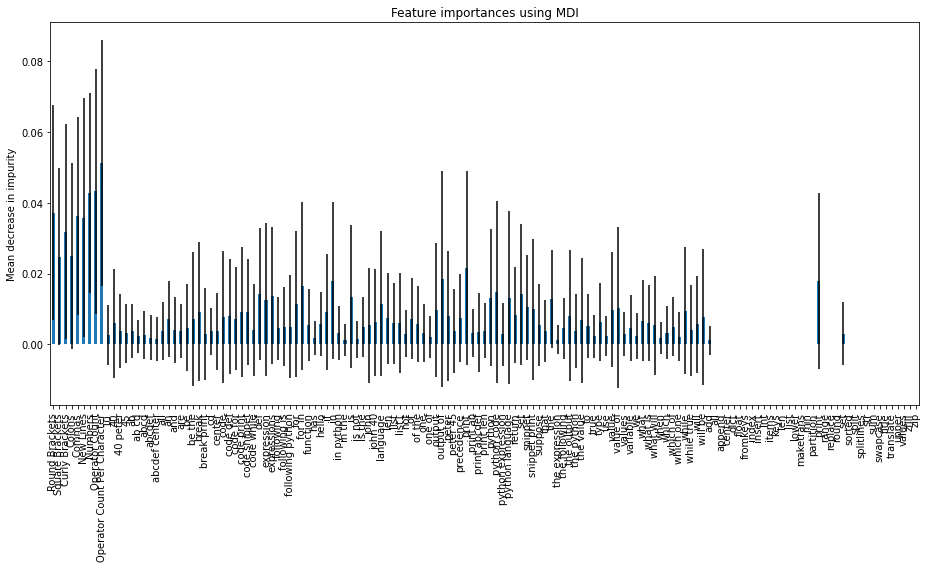

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=features.columns)


fig, ax = plt.subplots(figsize=(13,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [149]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    clf, features_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=features.columns)

Elapsed time to compute the importances: 20.573 seconds


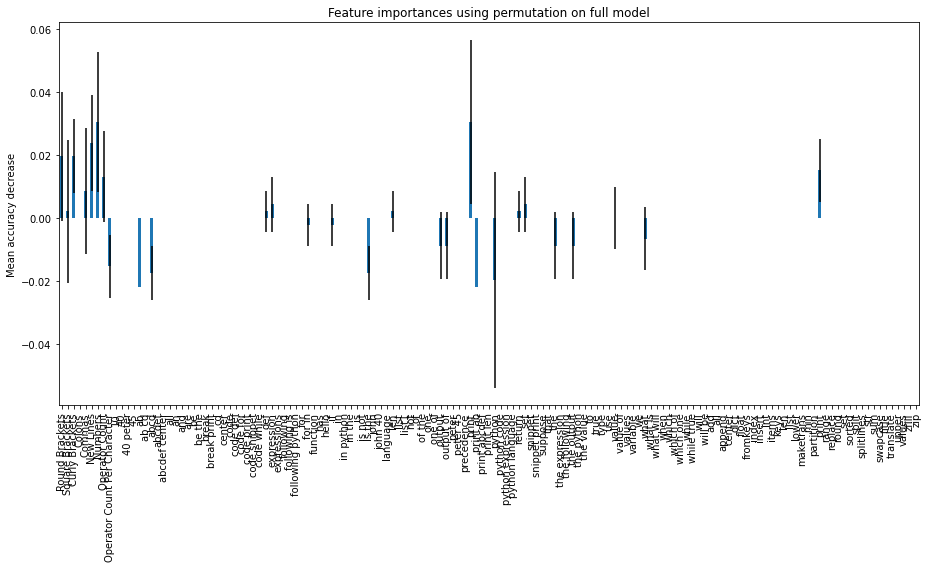

In [150]:
fig, ax = plt.subplots(figsize=(13,8))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

jupyter notebook — NotebookApp.allow_origin=’https://colab.research.google.com' — port=8888 — NotebookApp.port_retries=0